In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sb
import scipy as sp

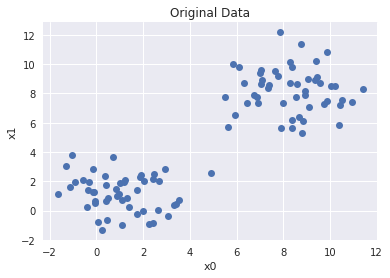

In [2]:
mu1 = [1.0, 1.0]
mu2 = [8.0, 8.0]

cov = [[2.0, 0.0], [0.0, 2.0]]

x1, y1 = np.random.multivariate_normal(mu1, cov, 50).T
x2, y2 = np.random.multivariate_normal(mu2, cov, 50).T

X = np.concatenate((x1, x2))
Y = np.concatenate((y1, y2))

sb.set()
plt.title('Original Data')
plt.xlabel('x0')
plt.ylabel('x1')
plt.plot(X, Y, 'o')

In [3]:
def create_kernel(sigma):
    def kernel(x, y):
        return np.exp((x - y) ** 2.0 / (2.0 * sigma * sigma))
    
    def deriv_kernel(x, y):
        ans = np.exp((x - y) ** 2.0 / (2.0 * sigma * sigma))
        den = (1.0 / ( sigma*sigma))
        return den * ans * (x - y)
    
    return (kernel, deriv_kernel)

def parzen(X, x, kernel):
    ans = 0.0
    n = len(X)
    for xi in X:
        ans += kernel(x, xi)
    return ans / n


def force(X, alpha, sigma):
    kernel, deriv = create_kernel(sigma)
    ans = np.array([(1.0 - alpha)] * len(X))
    for i in range(len(X)):
        ans[i] *= (parzen(X, X[i], kernel) ** (alpha - 2.0))
        ans[i] *= parzen(X, X[i], deriv)
    return ans

def plot_IP(X, Y, alpha, sigma):
    plt.figure(figsize=(10, 10))
    plt.title("Information Potential: alpha = %s, sigma = %s" % (alpha, sigma))
    U = force(X, alpha, sigma)
    V = force(Y, alpha, sigma)
    M = np.hypot(U, V)
    Q = plt.quiver(X, Y, U, V, M, units='xy', pivot='tail', width=0.04)
    plt.scatter(X, Y, color='k', s=10)

## Caso $\alpha < 1$

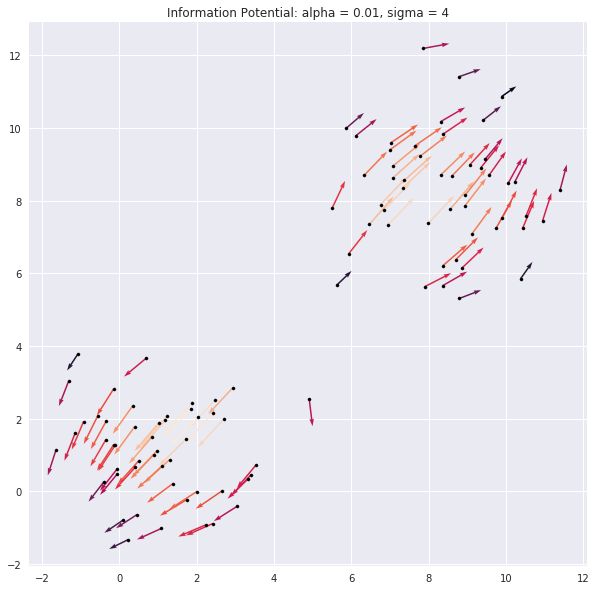

In [4]:
plot_IP(X, Y, 0.01, 4)

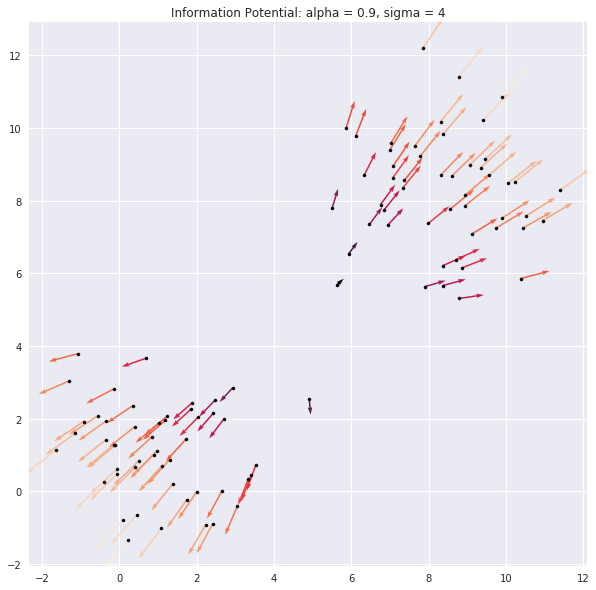

In [5]:
plot_IP(X, Y, 0.9, 4)

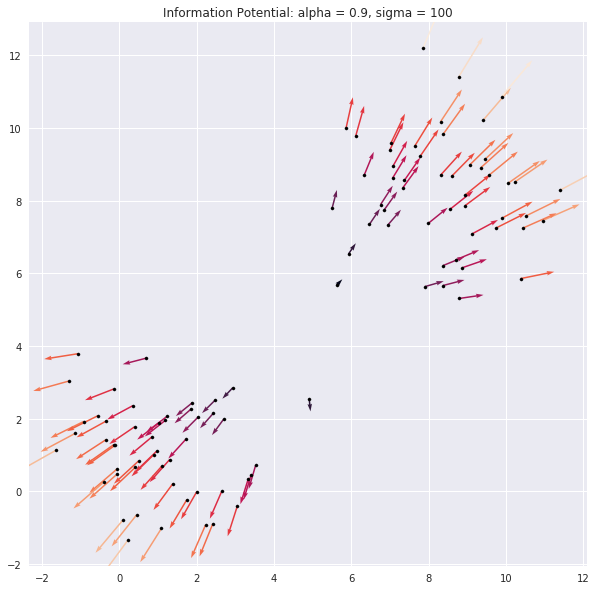

In [6]:
plot_IP(X, Y, 0.9, 100)

## Caso $\alpha > 1$

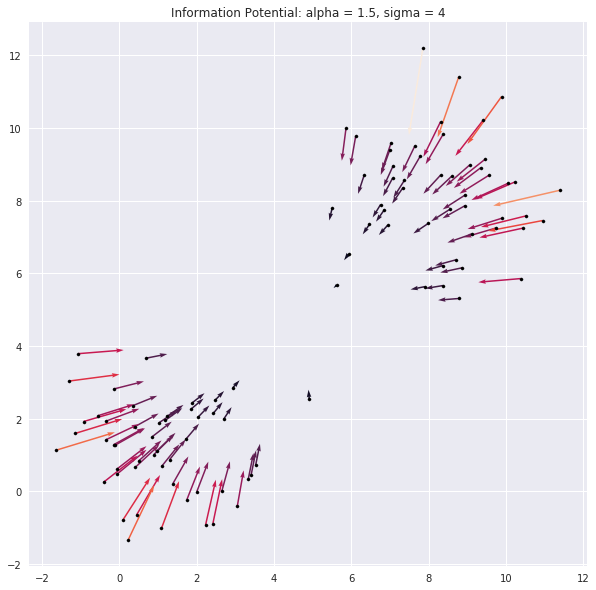

In [7]:
plot_IP(X, Y, 1.5, 4)

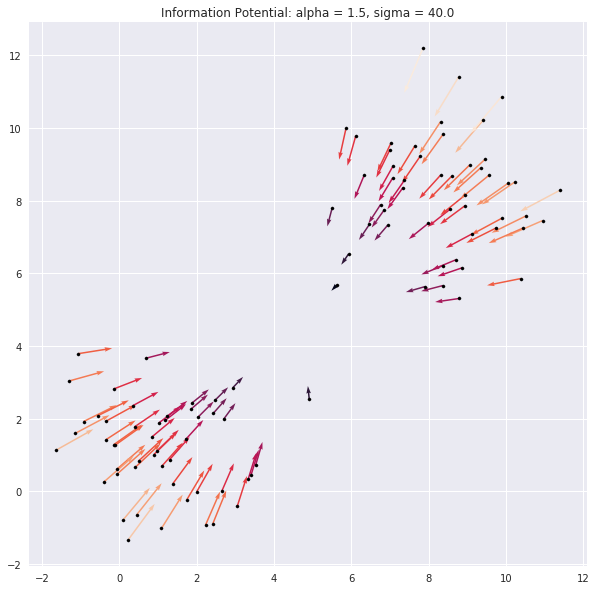

In [8]:
plot_IP(X, Y, 1.5, 40.0)

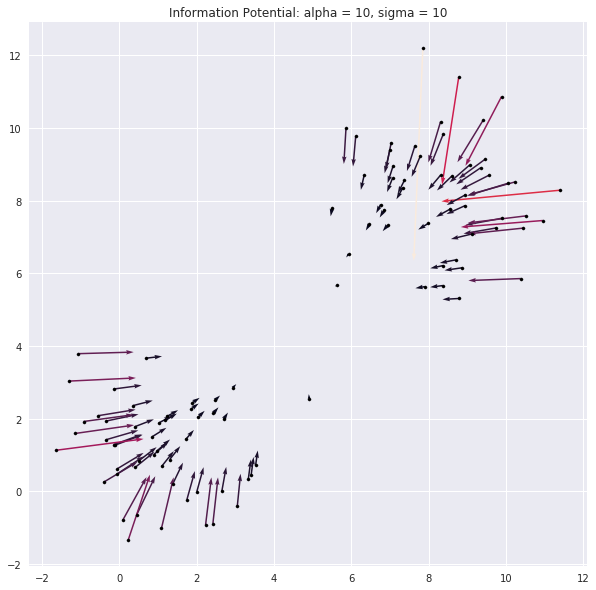

In [9]:
plot_IP(X, Y, 10, 10)

### Conclusiones.

- Al graficar las fuerzas de cada punto, se puede notar como se trata de "optimizar la entropia", por ejemplo cuando $\alpha < 1$ las flechas apuntan hacia "afuera", cuando $\alpha > 1$  las flechas aputan hacia "adentro".

- Tambien se puede observar que los estimadores son bastante robustos con respecto a la eleccion de $\sigma$, por ejemplo al cambiarlo de 4 a 40 (con $\alpha = 1.5$) el resultado es el mismo.
